## Assignment 13 Mushroom Dataset

** Your assignment is to
• First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!

• Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.

• Add meaningful names for each column.

• Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.

• Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.

• Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous. **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# the code below will read and display the csv data
mushroom_page = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
mushroom_page.head(20)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
5,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
6,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
7,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
8,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m
9,e,x,y,y,t,l,f,c,b,g,...,s,w,w,p,w,o,p,n,n,g


Now we will display 3 columns (edible/poisonous, odor, population)

In [4]:
mushroom_page = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', sep=',', header=None, usecols=[0,5,21], names=["Edible/Poisonous","Odor","Population"])
mushroom_page.head(20)

,Edible/Poisonous,Odor,Population
0,p,p,s
1,e,a,n
2,e,l,n
3,p,p,s
4,e,n,a
5,e,a,n
6,e,a,n
7,e,l,s
8,p,p,v
9,e,a,s


Lets replace the codes used in the data with numerical values
1. Edible/Poisonous: e=0, p=1,
2. Odor: a=2, l=3, c=4, y=5, f=6, m=7, n=8, p=9, s=10
3. Pupulation: a=11, c=12, n=13, s=14, v=15, y=16

In [5]:
mushroom_page.replace(to_replace={'Edible/Poisonous':{'p': 0, 'e':1}}, inplace=True)
mushroom_page.replace(to_replace={'Odor':{'a':2, 'l':3, 'c':4, 'y':5, 'f':6, 'm':7, 'n':8, 'p':9, 's':10}}, inplace=True)
mushroom_page.replace(to_replace={'Population':{'a':11, 'c':12, 'n':13, 's':14, 'v':15, 'y':16}}, inplace=True)
mushroom_page.head(20)

,Edible/Poisonous,Odor,Population
0,0,9,14
1,1,2,13
2,1,3,13
3,0,9,14
4,1,8,11
5,1,2,13
6,1,2,13
7,1,3,14
8,0,9,15
9,1,2,14


Now we'll analyze the data and plot it on a graph

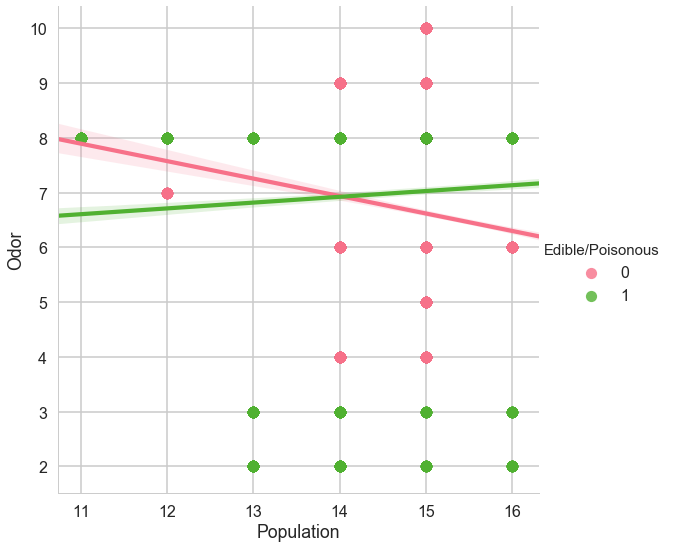

In [6]:
sns.set(style='whitegrid', context='poster')
pal = sns.color_palette("husl", 3)
g = sns.lmplot(hue='Edible/Poisonous', x='Population', y='Odor', data=mushroom_page, palette=pal, size=8)
g.set_axis_labels('Population', 'Odor')
sns.plt.show()

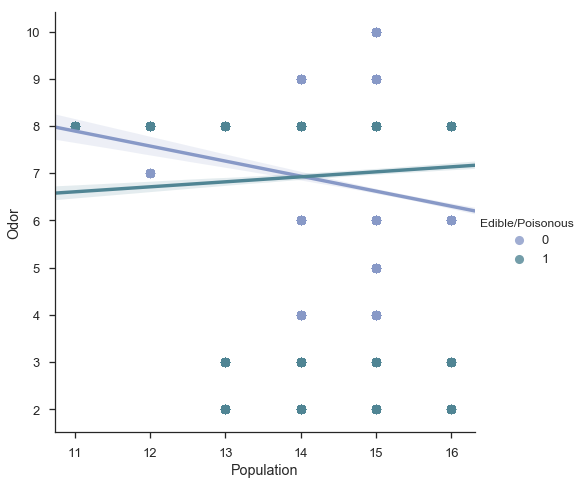

In [7]:
sns.set(style="ticks", context="talk")
acchorse = mushroom_page[['Population', 'Odor', 'Edible/Poisonous']]
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x='Population', y='Odor', hue='Edible/Poisonous', data=acchorse, palette=pal, size=7)
g.set_axis_labels("Population", "Odor")
sns.plt.show()

# Conclusion:
Based on the analysis it seems odor is the most helpful criteria in determining what mushrooms are edible/poisonous